In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:
#Importing modules which we use for this project

# * WEBSCRAPING

In [3]:
movie_name=[]
movie_year=[]
movie_genre=[]
movie_runtime=[]
movie_rating=[]
movie_metascore=[]
movie_votes=[]
movie_gross=[] 
 
for i in range(1,10):
    
     
        url = ("https://www.imdb.com/list/ls048276758/?sort=list_order,asc&st_dt=&mode=detail&page={}".format(i))
        
        response = requests.get(url)
        soup = BeautifulSoup(response.text, "html.parser")
        
        movie_data = soup.findAll('div', attrs={'lister-item mode-detail'})
        
        for store in movie_data:
            name = store.h3.a.text
            movie_name.append(name)
    
            year = store.h3.find('span', class_='lister-item-year text-muted unbold').text.replace("(","").replace(")","").replace("I","").replace("II","").replace("–1990","").replace(" TV Movie","")
            movie_year.append(year)
    
            genre = store.p.find("span", class_="genre").text.replace("\n","").replace(" ","") if store.p.find("span", class_="genre") else "NaN"
            movie_genre.append(genre)
    
            duration = store.p.find("span", class_="runtime").text.replace("min","")
            movie_runtime.append(duration)
    
            rating = store.find("span", class_="ipl-rating-star__rating").text.replace("\n","")
            movie_rating.append(rating)
    
            meta = store.find("div", class_="inline-block ratings-metascore").text.replace("\n","").replace("Metascore","").replace(" ","") if store.find("div", class_="inline-block ratings-metascore") else "NaN"
            movie_metascore.append(meta)
    
            group = store.find_all("span", attrs = {"name":"nv"})
    
            vote = group[0].text.replace(",","")
            movie_votes.append(vote)
    
            gross = group[1].text.replace("$","").replace("M","") if len(group)>1 else "NaN"
            movie_gross.append(gross)

In [4]:
## 1. By using imdb url, scrapped data from the website to create data frame
## 2. some part of the cleaning done along with code 
## 3. by using replace we can remove unwanted things from scrapped data

# * DATA FRAME

In [5]:
df = pd.DataFrame({"movie_title":movie_name, "year":movie_year, "genre":movie_genre, "duration_in_min":movie_runtime, "ratings":movie_rating, "metascore":movie_metascore, "votes":movie_votes, "gross_in_million_dollars":movie_gross})
df
## By using above code we get data frame in order, with some of null values present in it as 'NaN'
## Actually NaN = Not a Number for Numerical Data
## ........ NaN = Not Available for Categorical Data

,movie_title,year,genre,duration_in_min,ratings,metascore,votes,gross_in_million_dollars
0,The Godfather,1972,"Crime,Drama",175,9.2,100,1840638,134.97
1,Tôkyô monogatari,1953,Drama,136,8.2,NaN,61959,NaN
2,Shichinin no samurai,1954,"Action,Drama",207,8.6,98,344958,0.27
3,The Godfather Part II,1974,"Crime,Drama",202,9,90,1261099,57.30
4,Casablanca,1942,"Drama,Romance,War",102,8.5,100,569347,1.02
...,...,...,...,...,...,...,...,...
895,Blood Simple,1984,"Crime,Drama,Thriller",99,7.6,83,97256,2.15
896,Force of Evil,1948,"Crime,Drama,Film-Noir",79,7.2,89,6901,NaN
897,Never Give a Sucker an Even Break,1941,"Comedy,Musical",71,7.1,NaN,2412,NaN
898,La chute de la maison Usher,1928,"Drama,Fantasy,Horror",63,7.3,NaN,4071,NaN


# * IMPORTING OS TO GET PATH

In [6]:
import os
os.getcwd()

'C:\\Users\\karth\\Pandas Practice\\Untitled Folder'

# * CONVERTING DATA FRAME TO CSV FILE

In [7]:
df.to_csv("imdb_movies_3.csv", index=False)

In [8]:
## By using 'to_csv' we can convert data frame to csv file

# * IMPORTING MODULE "READ" TO READ CSV FILE

In [9]:
import numpy as np
import pandas as pd

import re

# * TO GET CSV FILE

In [10]:
df = pd.read_csv('imdb_movies_3.csv')
df
## With the help of 'pd.read_csv' we get save csv file as data frame

,movie_title,year,genre,duration_in_min,ratings,metascore,votes,gross_in_million_dollars
0,The Godfather,1972,"Crime,Drama",175,9.2,100.0,1840638,134.97
1,Tôkyô monogatari,1953,Drama,136,8.2,NaN,61959,NaN
2,Shichinin no samurai,1954,"Action,Drama",207,8.6,98.0,344958,0.27
3,The Godfather Part II,1974,"Crime,Drama",202,9.0,90.0,1261099,57.30
4,Casablanca,1942,"Drama,Romance,War",102,8.5,100.0,569347,1.02
...,...,...,...,...,...,...,...,...
895,Blood Simple,1984,"Crime,Drama,Thriller",99,7.6,83.0,97256,2.15
896,Force of Evil,1948,"Crime,Drama,Film-Noir",79,7.2,89.0,6901,NaN
897,Never Give a Sucker an Even Break,1941,"Comedy,Musical",71,7.1,NaN,2412,NaN
898,La chute de la maison Usher,1928,"Drama,Fantasy,Horror",63,7.3,NaN,4071,NaN


# * TOP 20 ROWS

In [11]:
df.head(20)

,movie_title,year,genre,duration_in_min,ratings,metascore,votes,gross_in_million_dollars
0,The Godfather,1972,"Crime,Drama",175,9.2,100.0,1840638,134.97
1,Tôkyô monogatari,1953,Drama,136,8.2,NaN,61959,NaN
2,Shichinin no samurai,1954,"Action,Drama",207,8.6,98.0,344958,0.27
3,The Godfather Part II,1974,"Crime,Drama",202,9.0,90.0,1261099,57.30
4,Casablanca,1942,"Drama,Romance,War",102,8.5,100.0,569347,1.02
5,Citizen Kane,1941,"Drama,Mystery",119,8.3,100.0,441222,1.59
6,Lawrence of Arabia,1962,"Adventure,Biography,Drama",218,8.3,100.0,293411,44.82
7,12 Angry Men,1957,"Crime,Drama",96,9.0,96.0,784067,4.36
8,Sunset Blvd.,1950,"Drama,Film-Noir",110,8.4,NaN,221768,NaN
9,Shoah,1985,"Documentary,History,War",566,8.7,99.0,9564,0.02


# * BOTTOM 20 ROWS

In [12]:
df.tail(20)

,movie_title,year,genre,duration_in_min,ratings,metascore,votes,gross_in_million_dollars
880,Park Row,1952,"Drama,Thriller",83,7.2,NaN,1872,NaN
881,High Hopes,1988,"Comedy,Drama",108,7.4,84.0,5345,1.19
882,Inside Llewyn Davis,2013,"Drama,Music",104,7.4,93.0,154579,13.24
883,Aquarius,2016,Drama,146,7.4,88.0,19951,0.29
884,Bad Day at Black Rock,1955,"Crime,Drama,Mystery",81,7.7,NaN,22345,NaN
885,Fort Apache,1948,Western,128,7.4,NaN,18429,NaN
886,À nous la liberté,1931,"Comedy,Musical",104,7.4,NaN,4622,NaN
887,Zelig,1983,Comedy,79,7.7,NaN,42322,11.80
888,You Only Live Once,1937,"Crime,Drama,Film-Noir",86,7.3,NaN,6959,NaN
889,El Chacal de Nahueltoro,1969,"Biography,Crime,Drama",95,7.6,NaN,1039,NaN


# * INFORMATION OF DATA FRAME

In [13]:
df.info()
# By this information we came to know that, how many rows?, how many columns?, which column has numerical data? which column has categorical data? etc..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   movie_title               900 non-null    object 
 1   year                      900 non-null    object 
 2   genre                     899 non-null    object 
 3   duration_in_min           900 non-null    int64  
 4   ratings                   900 non-null    float64
 5   metascore                 538 non-null    float64
 6   votes                     900 non-null    int64  
 7   gross_in_million_dollars  524 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 56.4+ KB


# * TO CHECK NULL VALUES

In [14]:
df.isnull()
# By using 'isnull' we get the boolean values True or False
# True is represent as having null value at the particular location
# False is represent as having non null value at the particular location

,movie_title,year,genre,duration_in_min,ratings,metascore,votes,gross_in_million_dollars
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,True
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
895,False,False,False,False,False,False,False,False
896,False,False,False,False,False,False,False,True
897,False,False,False,False,False,True,False,True
898,False,False,False,False,False,True,False,True


# * CHECKING NULL VALUES ACCORDING TO COLUMNS


In [15]:
df.isnull().sum()
# by using 'isnull().sum()' we get how many null values present in column wise

movie_title                   0
year                          0
genre                         1
duration_in_min               0
ratings                       0
metascore                   362
votes                         0
gross_in_million_dollars    376
dtype: int64

# * TO GET PERCENTAGE OF NULL VALUES ACCORDING TO COLUMNS

In [16]:
(df.isnull().sum()/len(df))*100

movie_title                  0.000000
year                         0.000000
genre                        0.111111
duration_in_min              0.000000
ratings                      0.000000
metascore                   40.222222
votes                        0.000000
gross_in_million_dollars    41.777778
dtype: float64

# * DESCRIBING THE DATA FRAME

In [17]:
df.describe()
# This descirbe() shows presenting of outliers in the data frame or not...

,duration_in_min,ratings,metascore,votes,gross_in_million_dollars
count,900.000000,900.000000,538.000000,9.000000e+02,524.000000
mean,118.997778,7.871111,87.743494,1.547451e+05,43.960611
std,64.213683,0.367429,6.379466,3.203013e+05,106.207936
min,13.000000,5.700000,68.000000,3.200000e+01,0.000000
25%,94.000000,7.600000,83.250000,8.782250e+03,0.340000
50%,108.000000,7.900000,88.000000,2.587100e+04,3.900000
75%,128.000000,8.100000,92.000000,1.147242e+05,26.970000
max,931.000000,9.300000,100.000000,2.655610e+06,936.660000


# * DESCRIBING DATA FRAME ACCORDING TO OBJECT

In [18]:
df.describe(include='object')

,movie_title,year,genre
count,900,900,899
unique,899,115,212
top,Lola,2018,Drama
freq,2,25,126


# * SHAPE OF THE DATA FRAME

In [19]:
df.shape

(900, 8)

# * COLUMN NAMES OF DATA FRAME

In [20]:
df.columns

Index(['movie_title', 'year', 'genre', 'duration_in_min', 'ratings',
       'metascore', 'votes', 'gross_in_million_dollars'],
      dtype='object')

# * CHECKING NULL VALUES ACCORDING TO ROWS

In [21]:
df.isnull().sum(axis=1)
# By using this isnull().sum(axis=1) 'axis=1' gives row wise null values

0      0
1      2
2      0
3      0
4      0
      ..
895    0
896    1
897    2
898    2
899    2
Length: 900, dtype: int64

# * FILLING NULL VALUES IN THE COLUMN OF 'METASCORE'

In [22]:
df['metascore']=df['metascore'].fillna(df['metascore'].mean())
# By using 'fillna' fill the column which u want to fill the null values

In [23]:
df

,movie_title,year,genre,duration_in_min,ratings,metascore,votes,gross_in_million_dollars
0,The Godfather,1972,"Crime,Drama",175,9.2,100.000000,1840638,134.97
1,Tôkyô monogatari,1953,Drama,136,8.2,87.743494,61959,NaN
2,Shichinin no samurai,1954,"Action,Drama",207,8.6,98.000000,344958,0.27
3,The Godfather Part II,1974,"Crime,Drama",202,9.0,90.000000,1261099,57.30
4,Casablanca,1942,"Drama,Romance,War",102,8.5,100.000000,569347,1.02
...,...,...,...,...,...,...,...,...
895,Blood Simple,1984,"Crime,Drama,Thriller",99,7.6,83.000000,97256,2.15
896,Force of Evil,1948,"Crime,Drama,Film-Noir",79,7.2,89.000000,6901,NaN
897,Never Give a Sucker an Even Break,1941,"Comedy,Musical",71,7.1,87.743494,2412,NaN
898,La chute de la maison Usher,1928,"Drama,Fantasy,Horror",63,7.3,87.743494,4071,NaN


In [24]:
df.isnull().sum()

movie_title                   0
year                          0
genre                         1
duration_in_min               0
ratings                       0
metascore                     0
votes                         0
gross_in_million_dollars    376
dtype: int64

# * DROPPING NULL VALUES

In [25]:
data = df.dropna()

In [26]:
# on my requirement of rows and columns, i dropped the missing value rows

In [27]:
data

,movie_title,year,genre,duration_in_min,ratings,metascore,votes,gross_in_million_dollars
0,The Godfather,1972,"Crime,Drama",175,9.2,100.0,1840638,134.97
2,Shichinin no samurai,1954,"Action,Drama",207,8.6,98.0,344958,0.27
3,The Godfather Part II,1974,"Crime,Drama",202,9.0,90.0,1261099,57.30
4,Casablanca,1942,"Drama,Romance,War",102,8.5,100.0,569347,1.02
5,Citizen Kane,1941,"Drama,Mystery",119,8.3,100.0,441222,1.59
...,...,...,...,...,...,...,...,...
891,Moneyball,2011,"Biography,Drama,Sport",133,7.6,87.0,422326,75.61
892,Milk,2008,"Biography,Drama",128,7.5,83.0,173418,31.84
893,"Deux jours, une nuit",2014,Drama,95,7.3,89.0,48598,1.44
894,Foxtrot,2017,Drama,113,7.2,88.0,7665,0.62


In [28]:
# new data frame without missing values

# * CHECKING INFORMATION OF DATA FRAME

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524 entries, 0 to 895
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   movie_title               524 non-null    object 
 1   year                      524 non-null    object 
 2   genre                     524 non-null    object 
 3   duration_in_min           524 non-null    int64  
 4   ratings                   524 non-null    float64
 5   metascore                 524 non-null    float64
 6   votes                     524 non-null    int64  
 7   gross_in_million_dollars  524 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 36.8+ KB


# * CONVERTING OBJECT TYPE TO INT TYPE 

In [30]:
data["year"]=data['year'].astype(int)

# * CHECKING INFORMATION

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524 entries, 0 to 895
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   movie_title               524 non-null    object 
 1   year                      524 non-null    int32  
 2   genre                     524 non-null    object 
 3   duration_in_min           524 non-null    int64  
 4   ratings                   524 non-null    float64
 5   metascore                 524 non-null    float64
 6   votes                     524 non-null    int64  
 7   gross_in_million_dollars  524 non-null    float64
dtypes: float64(3), int32(1), int64(2), object(2)
memory usage: 34.8+ KB


# * CHECKING DUPLICATED VALUES OF DATA FRAME

In [32]:
data.duplicated()

0      False
2      False
3      False
4      False
5      False
       ...  
891    False
892    False
893    False
894    False
895    False
Length: 524, dtype: bool

# * SUM OF DUPLICATED VALUES

In [33]:
data.duplicated().sum()

0

In [34]:
data

,movie_title,year,genre,duration_in_min,ratings,metascore,votes,gross_in_million_dollars
0,The Godfather,1972,"Crime,Drama",175,9.2,100.0,1840638,134.97
2,Shichinin no samurai,1954,"Action,Drama",207,8.6,98.0,344958,0.27
3,The Godfather Part II,1974,"Crime,Drama",202,9.0,90.0,1261099,57.30
4,Casablanca,1942,"Drama,Romance,War",102,8.5,100.0,569347,1.02
5,Citizen Kane,1941,"Drama,Mystery",119,8.3,100.0,441222,1.59
...,...,...,...,...,...,...,...,...
891,Moneyball,2011,"Biography,Drama,Sport",133,7.6,87.0,422326,75.61
892,Milk,2008,"Biography,Drama",128,7.5,83.0,173418,31.84
893,"Deux jours, une nuit",2014,Drama,95,7.3,89.0,48598,1.44
894,Foxtrot,2017,Drama,113,7.2,88.0,7665,0.62


# * GROUPING AND SUMMERISING DATAFRAME

In [35]:
data

,movie_title,year,genre,duration_in_min,ratings,metascore,votes,gross_in_million_dollars
0,The Godfather,1972,"Crime,Drama",175,9.2,100.0,1840638,134.97
2,Shichinin no samurai,1954,"Action,Drama",207,8.6,98.0,344958,0.27
3,The Godfather Part II,1974,"Crime,Drama",202,9.0,90.0,1261099,57.30
4,Casablanca,1942,"Drama,Romance,War",102,8.5,100.0,569347,1.02
5,Citizen Kane,1941,"Drama,Mystery",119,8.3,100.0,441222,1.59
...,...,...,...,...,...,...,...,...
891,Moneyball,2011,"Biography,Drama,Sport",133,7.6,87.0,422326,75.61
892,Milk,2008,"Biography,Drama",128,7.5,83.0,173418,31.84
893,"Deux jours, une nuit",2014,Drama,95,7.3,89.0,48598,1.44
894,Foxtrot,2017,Drama,113,7.2,88.0,7665,0.62


In [36]:
by_genre = data.groupby('genre')
by_genre.groups
# a group is formed based on 'genre' column
# it gives information about different genres 

{'Action,Adventure': [97], 'Action,Adventure,Comedy': [131, 779], 'Action,Adventure,Drama': [273, 291, 322, 332, 703, 803], 'Action,Adventure,Fantasy': [277, 279], 'Action,Adventure,History': [495], 'Action,Adventure,Mystery': [48], 'Action,Adventure,Romance': [454], 'Action,Adventure,Sci-Fi': [247, 330, 504, 683, 778], 'Action,Adventure,Thriller': [426, 798], 'Action,Adventure,Western': [212], 'Action,Biography,Crime': [663], 'Action,Comedy,Romance': [40, 245], 'Action,Comedy,Thriller': [232], 'Action,Crime,Drama': [147, 450, 821], 'Action,Drama': [2, 641], 'Action,Drama,History': [457], 'Action,Drama,Mystery': [819], 'Action,Drama,Sci-Fi': [472, 765], 'Action,Drama,Sport': [782], 'Action,Drama,War': [55], 'Action,Mystery,Thriller': [822], 'Action,Sci-Fi': [661, 702], 'Action,Thriller,War': [222], 'Adventure,Biography,Drama': [6, 239, 590], 'Adventure,Comedy,Crime': [485], 'Adventure,Comedy,Drama': [87, 517, 618], 'Adventure,Comedy,Family': [250], 'Adventure,Comedy,Fantasy': [124], 'A

In [37]:
by_genre.get_group('Drama')
#data frame formed with respective 'drama' genre

,movie_title,year,genre,duration_in_min,ratings,metascore,votes,gross_in_million_dollars
11,All About Eve,1950,Drama,138,8.2,98.000000,131623,0.01
12,Dekalog,1989,Drama,572,9.0,100.000000,25755,0.10
23,One Flew Over the Cuckoo's Nest,1975,Drama,133,8.7,84.000000,1002185,112.00
28,Pather Panchali,1955,Drama,125,8.3,87.743494,33171,0.54
35,Ladri di biciclette,1948,Drama,89,8.3,87.743494,163641,0.33
...,...,...,...,...,...,...,...,...
841,Ida,2013,Drama,82,7.4,91.000000,58023,3.83
865,120 battements par minute,2017,Drama,143,7.4,84.000000,15657,0.13
883,Aquarius,2016,Drama,146,7.4,88.000000,19951,0.29
893,"Deux jours, une nuit",2014,Drama,95,7.3,89.000000,48598,1.44


In [38]:
by_genre['ratings'].mean()
# mean values of Different genre based on ratings

genre
Action,Adventure            8.400000
Action,Adventure,Comedy     8.100000
Action,Adventure,Drama      8.416667
Action,Adventure,Fantasy    8.650000
Action,Adventure,History    7.700000
                              ...   
Horror,Thriller             7.800000
Mystery,Romance,Thriller    8.300000
Mystery,Thriller            8.300000
Thriller,War                7.500000
Western                     8.066667
Name: ratings, Length: 165, dtype: float64

In [39]:
by_genre['year'].mean()
# mean values of Different genre based on year

genre
Action,Adventure            1981.000000
Action,Adventure,Comedy     1970.000000
Action,Adventure,Drama      2006.500000
Action,Adventure,Fantasy    1978.500000
Action,Adventure,History    1935.000000
                               ...     
Horror,Thriller             1968.000000
Mystery,Romance,Thriller    1958.000000
Mystery,Thriller            1975.333333
Thriller,War                1942.000000
Western                     1965.000000
Name: year, Length: 165, dtype: float64

In [40]:
by_genre['metascore'].mean()
# mean values of Different genre based on metascore

genre
Action,Adventure             85.000000
Action,Adventure,Comedy      81.871747
Action,Adventure,Drama       87.333333
Action,Adventure,Fantasy     86.000000
Action,Adventure,History     89.000000
                               ...    
Horror,Thriller              89.000000
Mystery,Romance,Thriller    100.000000
Mystery,Thriller             89.247831
Thriller,War                 87.743494
Western                      86.914498
Name: metascore, Length: 165, dtype: float64

In [41]:
by_genre['votes'].mean()
# mean values of Different genre based on votes

genre
Action,Adventure            9.606440e+05
Action,Adventure,Comedy     6.306915e+05
Action,Adventure,Drama      1.194467e+06
Action,Adventure,Fantasy    1.319208e+06
Action,Adventure,History    1.459900e+04
                                ...     
Horror,Thriller             1.294790e+05
Mystery,Romance,Thriller    4.014660e+05
Mystery,Thriller            5.895157e+05
Thriller,War                3.876000e+03
Western                     1.358500e+05
Name: votes, Length: 165, dtype: float64

In [42]:
by_genre['gross_in_million_dollars'].mean()
# mean values of Different genre based on gross_in_million_dollars

genre
Action,Adventure            248.160000
Action,Adventure,Comedy     167.105000
Action,Adventure,Drama      371.823333
Action,Adventure,Fantasy    306.610000
Action,Adventure,History      2.960000
                               ...    
Horror,Thriller               0.090000
Mystery,Romance,Thriller      3.200000
Mystery,Thriller             22.126667
Thriller,War                  0.020000
Western                       5.970000
Name: gross_in_million_dollars, Length: 165, dtype: float64

In [43]:
data['ratings'].sum()
# total sum of all ratings

4157.2

In [44]:
data['metascore'].sum()
#total sum of all metasore

45982.810408921934

In [45]:
data['gross_in_million_dollars'].sum()
# total sum of all gross_in_million_dollars

23035.359999999997

In [46]:
pd.DataFrame(by_genre['ratings'].sum().sort_values(ascending=False))
# It gives sum of particular genre's rating

,ratings
genre,
Drama,530.0
"Drama,Romance",219.4
"Comedy,Drama",182.6
"Crime,Drama",139.5
"Crime,Drama,Thriller",127.2
...,...
"Comedy,Romance,Drama",7.3
"Drama,Horror,Mystery",7.2
"Adventure,Drama",7.1


In [47]:
pd.DataFrame(by_genre['metascore'].sum().sort_values(ascending=False))
# It gives sum of particular genre's metascore

,metascore
genre,
Drama,5938.152416
"Drama,Romance",2460.434944
"Comedy,Drama",2093.973978
"Crime,Drama",1515.973978
"Comedy,Drama,Romance",1411.973978
...,...
"Animation,Drama,Fantasy",79.000000
"Documentary,History,Music",77.000000
"Crime,Sci-Fi",77.000000


In [48]:
pd.DataFrame(by_genre['gross_in_million_dollars'].sum().sort_values(ascending=False))
# It gives sum of particular genre's gross_in_million_dollars 

,gross_in_million_dollars
genre,
"Animation,Adventure,Comedy",3684.11
"Action,Adventure,Drama",2230.94
"Action,Adventure,Sci-Fi",2168.52
"Animation,Action,Adventure",846.84
"Action,Crime,Drama",658.32
...,...
"Crime,Mystery,Thriller",0.03
"Drama,Musical,Romance",0.03
"Drama,Family",0.03


In [49]:
lambda x : x>0

<function __main__.<lambda>(x)>

In [50]:
data['gross_in_million_dollars'].apply(lambda x : x>0).sort_values(ascending=True)
# it give information of different movies with their gross which are sortted by above and below 0 

455    False
314    False
0       True
606     True
605     True
       ...  
282     True
281     True
279     True
277     True
895     True
Name: gross_in_million_dollars, Length: 524, dtype: bool

In [51]:
# Grouping and Summerising with respective categorical data and numerical data

# * PIVOT TABLE

In [52]:
data.columns

Index(['movie_title', 'year', 'genre', 'duration_in_min', 'ratings',
       'metascore', 'votes', 'gross_in_million_dollars'],
      dtype='object')

In [53]:
data.pivot_table('year', index='movie_title', aggfunc='mean')

,year
movie_title,
'Breaker' Morant,1980
'Round Midnight,1986
12 Angry Men,1957
12 Years a Slave,2013
120 battements par minute,2017
...,...
Zerkalo,1975
Zero Dark Thirty,2012
Zimna wojna,2018


In [54]:
# creating pivot table to show the average movies with release year of that movies.

In [55]:
data.pivot_table('ratings', index='movie_title', aggfunc='mean')

,ratings
movie_title,
'Breaker' Morant,7.8
'Round Midnight,7.4
12 Angry Men,9.0
12 Years a Slave,8.1
120 battements par minute,7.4
...,...
Zerkalo,8.0
Zero Dark Thirty,7.4
Zimna wojna,7.5


In [56]:
#pivot table to show that average movies with their rating 

In [57]:
data.pivot_table('metascore', index='movie_title', aggfunc='mean')

,metascore
movie_title,
'Breaker' Morant,72.000000
'Round Midnight,87.743494
12 Angry Men,96.000000
12 Years a Slave,96.000000
120 battements par minute,84.000000
...,...
Zerkalo,80.000000
Zero Dark Thirty,95.000000
Zimna wojna,90.000000


In [58]:
# pivot table to show that avergae movies with their metascore

In [59]:
data.pivot_table('duration_in_min', index='movie_title', aggfunc='mean')

,duration_in_min
movie_title,
'Breaker' Morant,107
'Round Midnight,133
12 Angry Men,96
12 Years a Slave,134
120 battements par minute,143
...,...
Zerkalo,107
Zero Dark Thirty,157
Zimna wojna,89


In [60]:
# pivot table to show that average movies with their runtime

In [61]:
data.pivot_table('votes', index='movie_title', aggfunc='mean')

,votes
movie_title,
'Breaker' Morant,13643
'Round Midnight,5369
12 Angry Men,784067
12 Years a Slave,698377
120 battements par minute,15657
...,...
Zerkalo,47053
Zero Dark Thirty,301046
Zimna wojna,57297


In [62]:
# pivot table to show that average movies with their votes

In [63]:
data.pivot_table('gross_in_million_dollars', index='movie_title', aggfunc='mean')

,gross_in_million_dollars
movie_title,
'Breaker' Morant,7.14
'Round Midnight,3.27
12 Angry Men,4.36
12 Years a Slave,56.67
120 battements par minute,0.13
...,...
Zerkalo,0.18
Zero Dark Thirty,95.72
Zimna wojna,4.57


In [64]:
# pivot table to show that average movies with their gross in million dollar

In [65]:
data.pivot_table('gross_in_million_dollars', index=['movie_title','genre'], aggfunc='mean')

,,gross_in_million_dollars
movie_title,genre,
'Breaker' Morant,"Drama,History,War",7.14
'Round Midnight,"Drama,Music",3.27
12 Angry Men,"Crime,Drama",4.36
12 Years a Slave,"Biography,Drama,History",56.67
120 battements par minute,Drama,0.13
...,...,...
Zerkalo,"Biography,Drama",0.18
Zero Dark Thirty,"Drama,History,Thriller",95.72
Zimna wojna,"Drama,Music,Romance",4.57


In [66]:
# pivot table to show that average movies with their genre and gross

In [67]:
data.pivot_table(['year','gross_in_million_dollars','ratings'], index='movie_title', aggfunc='mean')

,gross_in_million_dollars,ratings,year
movie_title,,,
'Breaker' Morant,7.14,7.8,1980
'Round Midnight,3.27,7.4,1986
12 Angry Men,4.36,9.0,1957
12 Years a Slave,56.67,8.1,2013
120 battements par minute,0.13,7.4,2017
...,...,...,...
Zerkalo,0.18,8.0,1975
Zero Dark Thirty,95.72,7.4,2012
Zimna wojna,4.57,7.5,2018


In [68]:
# pivot table to show that average movies with their gross, ratings, year

# * CROSS TAB

In [69]:
pd.crosstab(data['movie_title'],data['year'],).head(30)

year,1921,1923,1924,1925,1926,1927,1928,1929,1930,1931,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
movie_title,,,,,,,,,,,,,,,,,,,,,
'Breaker' Morant,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
'Round Midnight,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12 Angry Men,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12 Years a Slave,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
120 battements par minute,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
127 Hours,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2001: A Space Odyssey,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4 aventures de Reinette et Mirabelle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"4 luni, 3 saptamâni si 2 zile",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# top 30 average movie releases in which year.....

In [71]:
pd.crosstab(data['movie_title'],data['ratings'],).head(30)

ratings,6.9,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,...,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9.0,9.2,9.3
movie_title,,,,,,,,,,,,,,,,,,,,,
'Breaker' Morant,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
'Round Midnight,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12 Angry Men,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12 Years a Slave,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120 battements par minute,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127 Hours,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2001: A Space Odyssey,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4 aventures de Reinette et Mirabelle,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"4 luni, 3 saptamâni si 2 zile",0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [72]:
# cross tab of top 30 average movies of their ratings

# *** DATA VISUALIZATION USING MATPLOTLIB ***

# * HISTOGRAM OF 'RATINGS'

In [73]:
data.columns

Index(['movie_title', 'year', 'genre', 'duration_in_min', 'ratings',
       'metascore', 'votes', 'gross_in_million_dollars'],
      dtype='object')

Text(0.5, 1.0, 'rating of movies')

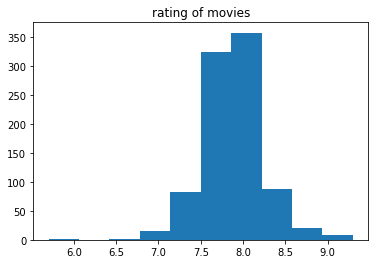

In [74]:
plt.hist(df['ratings'])
plt.title('rating of movies')
# It shows rating of the movies

# * HISTOGRAM OF 'METASCORE'

In [75]:
data.columns

Index(['movie_title', 'year', 'genre', 'duration_in_min', 'ratings',
       'metascore', 'votes', 'gross_in_million_dollars'],
      dtype='object')

Text(0.5, 1.0, 'metascore')

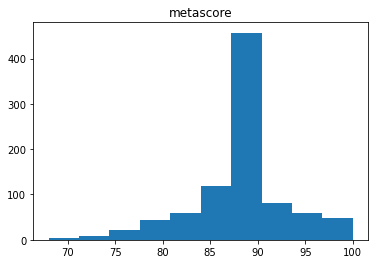

In [76]:
plt.hist(df['metascore'])
plt.title('metascore')
# It shows metascore of the movies

# * HISTOGRAM OF 'VOTES'

In [77]:
data.columns

Index(['movie_title', 'year', 'genre', 'duration_in_min', 'ratings',
       'metascore', 'votes', 'gross_in_million_dollars'],
      dtype='object')

Text(0.5, 1.0, 'votes of movies')

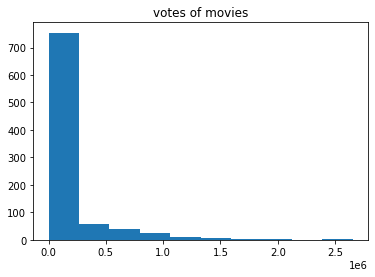

In [78]:
plt.hist(df['votes'])
plt.title('votes of movies')
# It shows votes of the movies

# * HISTOGRAM OF 'GROSS'

In [79]:
data.columns

Index(['movie_title', 'year', 'genre', 'duration_in_min', 'ratings',
       'metascore', 'votes', 'gross_in_million_dollars'],
      dtype='object')

Text(0.5, 1.0, 'gross in million dollors')

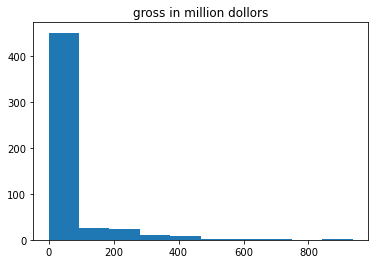

In [80]:
plt.hist(df['gross_in_million_dollars'])
plt.title("gross in million dollors")

# * HISTOGRAM OF 'DURATION'

In [81]:
data.columns

Index(['movie_title', 'year', 'genre', 'duration_in_min', 'ratings',
       'metascore', 'votes', 'gross_in_million_dollars'],
      dtype='object')

Text(0.5, 1.0, 'runtime of movies')

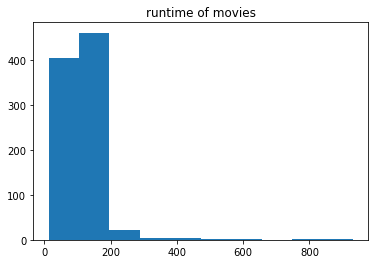

In [82]:
plt.hist(df['duration_in_min'])
plt.title('runtime of movies')

# * HISTOGRAM OF 'YEAR'

In [83]:
data.columns

Index(['movie_title', 'year', 'genre', 'duration_in_min', 'ratings',
       'metascore', 'votes', 'gross_in_million_dollars'],
      dtype='object')

Text(0.5, 1.0, 'year of release')

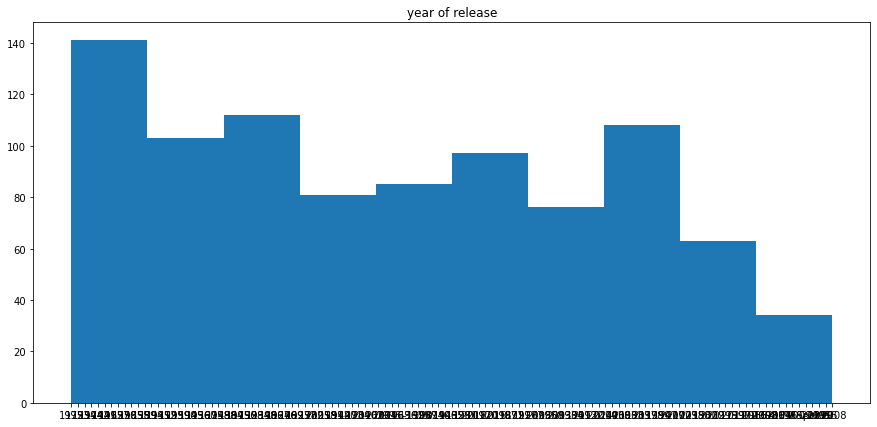

In [84]:
plt.figure(figsize=(15, 7))
plt.hist(df['year'])
plt.title('year of release')

# * SCATTER PLOT OF 'RATINGS' AND 'METASCORE'

In [85]:
data.columns

Index(['movie_title', 'year', 'genre', 'duration_in_min', 'ratings',
       'metascore', 'votes', 'gross_in_million_dollars'],
      dtype='object')

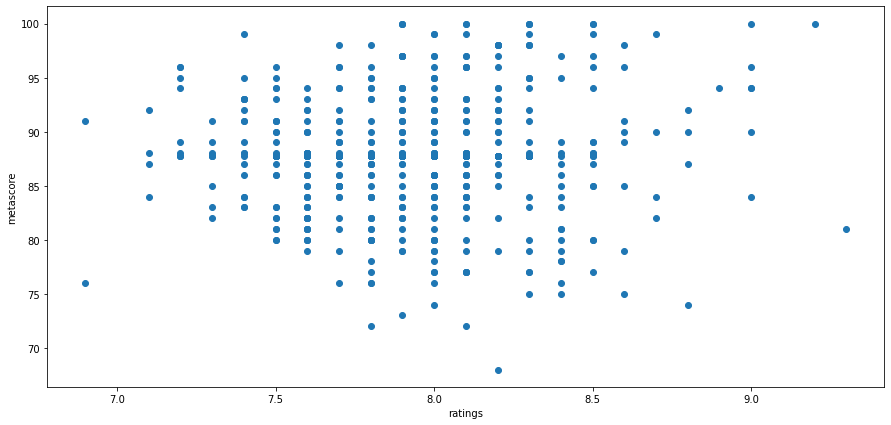

In [86]:
plt.figure(figsize=(15, 7))
plt.scatter(data['ratings'], data['metascore'])
plt.xlabel('ratings')
plt.ylabel('metascore')
plt.show()

# * BOXPLOT OF 'RATINGS'

In [87]:
data.columns

Index(['movie_title', 'year', 'genre', 'duration_in_min', 'ratings',
       'metascore', 'votes', 'gross_in_million_dollars'],
      dtype='object')

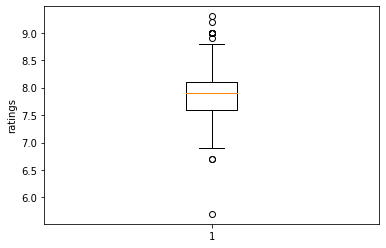

In [88]:
plt.boxplot(df['ratings'])
plt.ylabel("ratings")
plt.show()
#the boxplot shows the higher outlier in 'ratings'

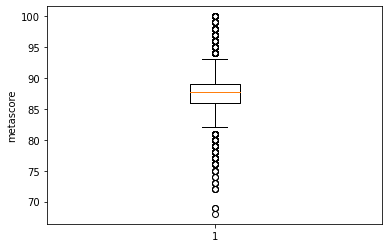

In [89]:
plt.boxplot(df['metascore'])
plt.ylabel("metascore")
plt.show()
#the boxplot shows the higher outlier in 'metascore'

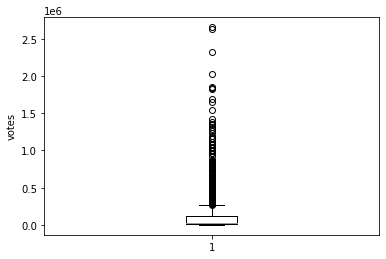

In [90]:
plt.boxplot(df['votes'])
plt.ylabel("votes")
plt.show()
#the boxplot shows the higher outlier in 'votes'

# *** DATA VISUALIZATION USING SEABORN***

# * Display title of the movie having runtime >= 180 minutes

In [91]:
data.columns

Index(['movie_title', 'year', 'genre', 'duration_in_min', 'ratings',
       'metascore', 'votes', 'gross_in_million_dollars'],
      dtype='object')

In [92]:
data[data['duration_in_min'] >= 180] ['movie_title']

2                                   Shichinin no samurai
3                                  The Godfather Part II
6                                     Lawrence of Arabia
9                                                  Shoah
12                                               Dekalog
17                                      Schindler's List
51                                   Fanny och Alexander
56                                         Andrei Rublev
93                                           Voyna i mir
151                                   La meglio gioventù
166                               Out 1, noli me tangere
191                                         Edvard Munch
196    Jeanne Dielman, 23, quai du commerce, 1080 Bru...
239                                      The Right Stuff
291                                    Avengers: Endgame
322        The Lord of the Rings: The Return of the King
380                                          Utvandrarna
422                          On

# * In which year there was highest average votings?

In [93]:
data.columns

Index(['movie_title', 'year', 'genre', 'duration_in_min', 'ratings',
       'metascore', 'votes', 'gross_in_million_dollars'],
      dtype='object')

In [94]:
data.groupby('year')['votes'].mean().sort_values(ascending=False)

year
1994    843144.428571
2001    712770.600000
2002    673676.800000
1995    636861.000000
1981    605808.000000
            ...      
1923     16173.500000
1956     13479.500000
1947     11863.500000
1929     10944.000000
1965      7367.000000
Name: votes, Length: 96, dtype: float64

# * Barplot of 'votes by year'

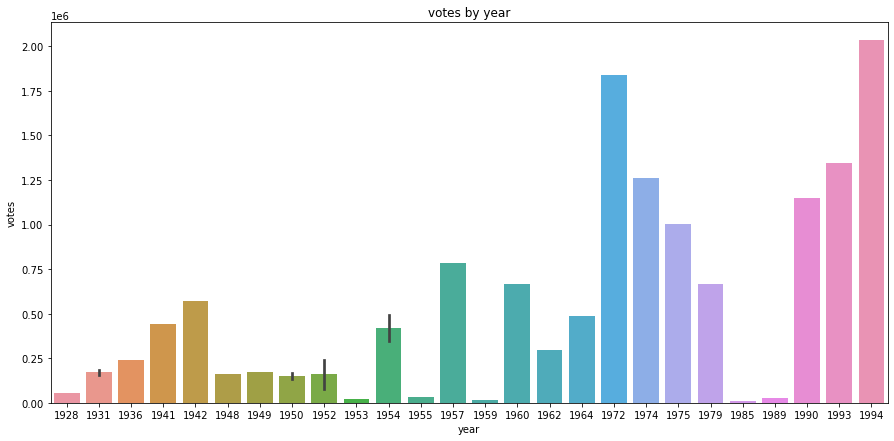

In [95]:
plt.figure(figsize=(15, 7))
sns.barplot(x='year', y='votes', data = data.head(30))
plt.title("votes by year")
plt.show()

# * In which year there was highest gross?

In [96]:
data.columns

Index(['movie_title', 'year', 'genre', 'duration_in_min', 'ratings',
       'metascore', 'votes', 'gross_in_million_dollars'],
      dtype='object')

In [97]:
data.groupby('year')['gross_in_million_dollars'].mean().sort_values(ascending=False)

year
2019    223.638333
1982    157.650000
1981    129.825000
2015    119.331250
2003    110.490000
           ...    
1965      0.123333
1956      0.095000
1950      0.055000
1928      0.020000
1929      0.010000
Name: gross_in_million_dollars, Length: 96, dtype: float64

# * Barplot of 'gross by year'

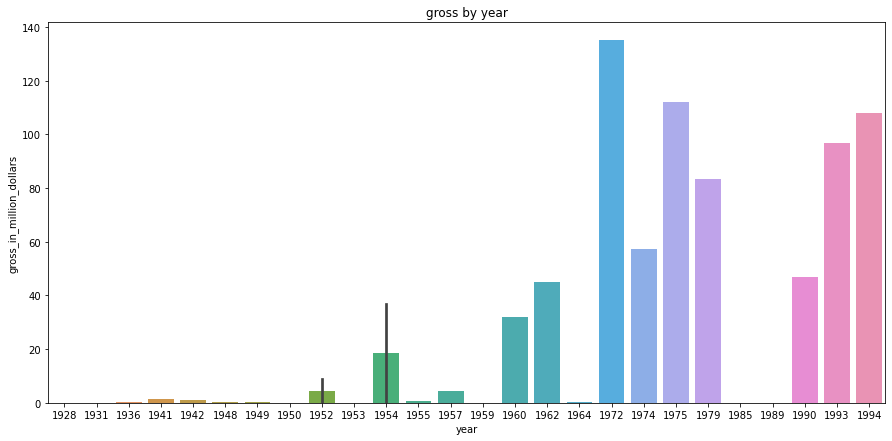

In [98]:
plt.figure(figsize=(15, 7))
sns.barplot(x='year', y='gross_in_million_dollars', data = data.head(30))
plt.title("gross by year")
plt.show()


# * Display top 10 lengthy movie titles and runtime?

In [99]:
data.columns

Index(['movie_title', 'year', 'genre', 'duration_in_min', 'ratings',
       'metascore', 'votes', 'gross_in_million_dollars'],
      dtype='object')

In [100]:
top_10_rt=data.nlargest(10,'duration_in_min')[['movie_title','duration_in_min']].set_index("movie_title")
top_10_rt

,duration_in_min
movie_title,
"Out 1, noli me tangere",776
Dekalog,572
Shoah,566
Voyna i mir,453
La meglio gioventù,366
Carlos,334
Gone with the Wind,238
La Belle Noiseuse,238
Once Upon a Time in America,229


# * Barplot of 'movie title by minutes'

Text(0.5, 1.0, 'movie title by min')

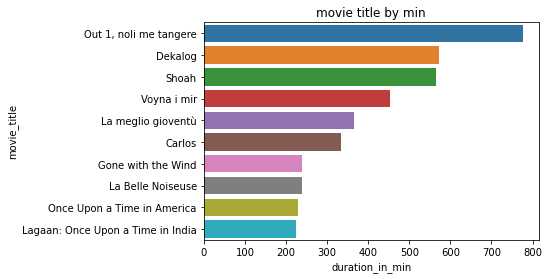

In [101]:
sns.barplot(x='duration_in_min', y=top_10_rt.index, data=top_10_rt)
plt.title('movie title by min')

# *  Display number of movies by year?

In [102]:
data.columns

Index(['movie_title', 'year', 'genre', 'duration_in_min', 'ratings',
       'metascore', 'votes', 'gross_in_million_dollars'],
      dtype='object')

In [103]:
data['year'].value_counts()

2017    21
2018    21
2016    16
2014    16
2015    16
        ..
1934     1
1929     1
1921     1
1926     1
1945     1
Name: year, Length: 96, dtype: int64

# * Counter plot of 'No.of movies per year'

Text(0.5, 1.0, 'No.of movies per year')

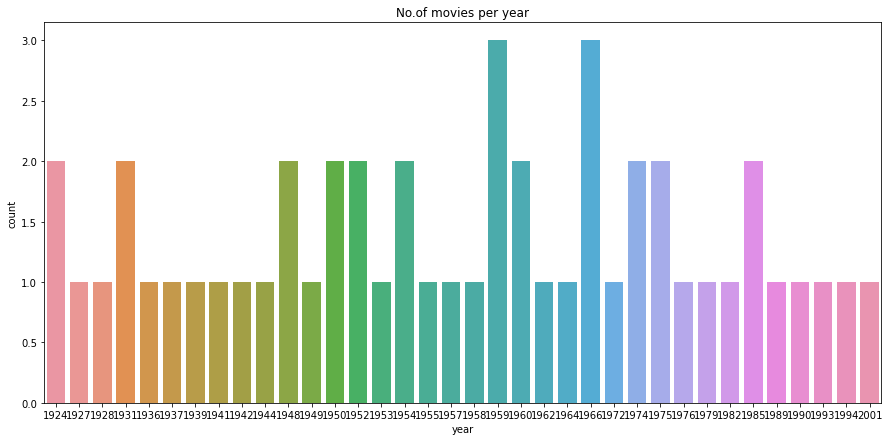

In [104]:
plt.figure(figsize=(15, 7))
sns.countplot(x='year',data=data.head(50))
plt.title("No.of movies per year")

# * Find most popular movie title by gross of the movie?

In [105]:
data.columns

Index(['movie_title', 'year', 'genre', 'duration_in_min', 'ratings',
       'metascore', 'votes', 'gross_in_million_dollars'],
      dtype='object')

In [106]:
data[data['gross_in_million_dollars'].max()==data['gross_in_million_dollars']]['movie_title']

778    Star Wars: Episode VII - The Force Awakens
Name: movie_title, dtype: object

# * Top 10 Highest rated movies 

In [107]:
data.columns

Index(['movie_title', 'year', 'genre', 'duration_in_min', 'ratings',
       'metascore', 'votes', 'gross_in_million_dollars'],
      dtype='object')

In [108]:
top_10_rated = data.nlargest(10,'ratings')[['movie_title','ratings']].set_index('movie_title')
top_10_rated

,ratings
movie_title,
The Shawshank Redemption,9.3
The Godfather,9.2
The Godfather Part II,9.0
12 Angry Men,9.0
Dekalog,9.0
Schindler's List,9.0
The Dark Knight,9.0
The Lord of the Rings: The Return of the King,9.0
Pulp Fiction,8.9


# * Barplot of 'movie_title by rating'

Text(0.5, 1.0, 'movie_title by ratings')

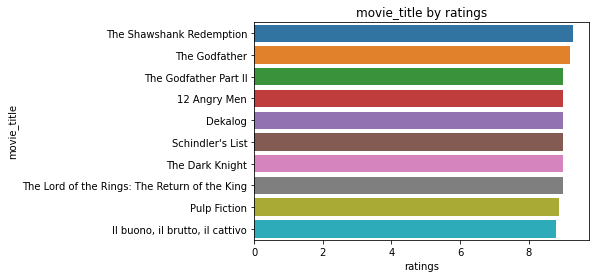

In [109]:
sns.barplot(x='ratings', y=top_10_rated.index, data=top_10_rated)
plt.title('movie_title by ratings')

# * Display top 10 Highest gross movie title?

In [110]:
data.columns

Index(['movie_title', 'year', 'genre', 'duration_in_min', 'ratings',
       'metascore', 'votes', 'gross_in_million_dollars'],
      dtype='object')

In [111]:
top_10_gross = data.nlargest(10,'gross_in_million_dollars')[['movie_title','gross_in_million_dollars']].set_index('movie_title')
top_10_gross

,gross_in_million_dollars
movie_title,
Star Wars: Episode VII - The Force Awakens,936.66
Avengers: Endgame,858.37
Black Panther,700.06
Incredibles 2,608.58
The Dark Knight,534.86
The Dark Knight Rises,448.14
E.T. the Extra-Terrestrial,435.11
Toy Story 4,434.04
The Lion King,422.78


# * Barplot of 'gross_in_million_dollars'

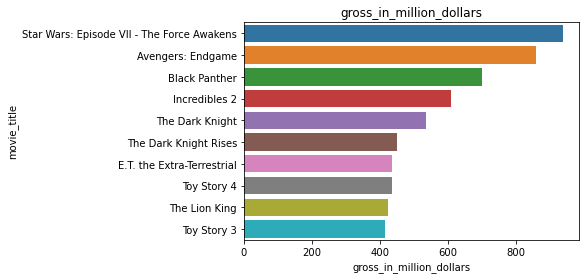

In [112]:
sns.barplot(x='gross_in_million_dollars', y=top_10_gross.index, data=top_10_gross)
plt.title('gross_in_million_dollars')
plt.show()

# * Find average rating of movies year wise?

In [113]:
data.columns

Index(['movie_title', 'year', 'genre', 'duration_in_min', 'ratings',
       'metascore', 'votes', 'gross_in_million_dollars'],
      dtype='object')

In [114]:
data.groupby('year')["ratings"].mean().sort_values(ascending=False)

year
1936    8.500000
1994    8.471429
1981    8.400000
1957    8.400000
1921    8.300000
          ...   
1970    7.712500
1930    7.666667
2017    7.652381
2018    7.652381
1933    7.650000
Name: ratings, Length: 96, dtype: float64

# * Barplot of 'avg rating by year'

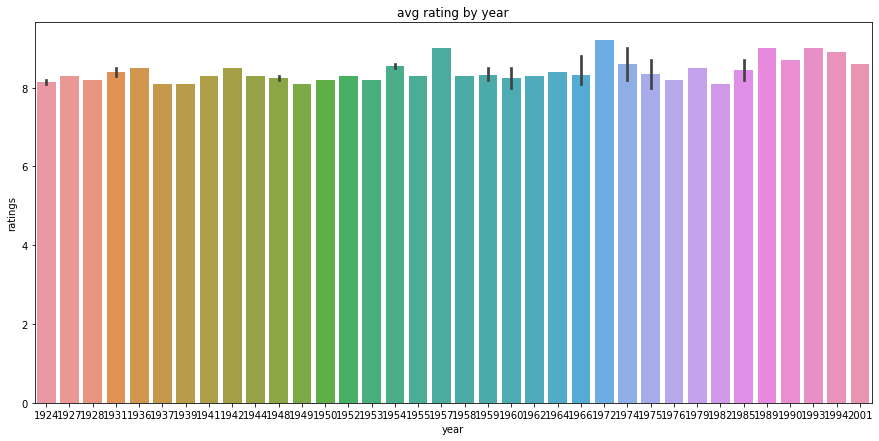

In [115]:
plt.figure(figsize=(15, 7))
sns.barplot(x='year', y='ratings', data = data.head(50))
plt.title("avg rating by year")
plt.show()

# * Does rating effect gross of the movie?

In [116]:
data.columns

Index(['movie_title', 'year', 'genre', 'duration_in_min', 'ratings',
       'metascore', 'votes', 'gross_in_million_dollars'],
      dtype='object')

# * scatter plot of 'gross by ratings'

Text(0.5, 1.0, 'gross by ratings')

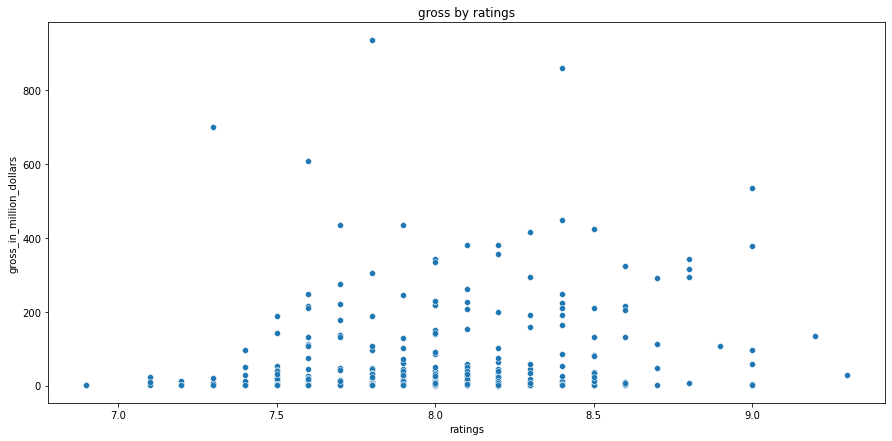

In [117]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x='ratings', y='gross_in_million_dollars', data=data)
plt.title('gross by ratings')

# * Count number of action movies?

In [118]:
data.columns

Index(['movie_title', 'year', 'genre', 'duration_in_min', 'ratings',
       'metascore', 'votes', 'gross_in_million_dollars'],
      dtype='object')

In [119]:
data['genre'].dtype

dtype('O')

In [120]:
len(data[data['genre'].str.contains('Action', case=False)])

44

# * Find unique values from genre?

In [121]:
data.columns

Index(['movie_title', 'year', 'genre', 'duration_in_min', 'ratings',
       'metascore', 'votes', 'gross_in_million_dollars'],
      dtype='object')

In [122]:
data['genre']

0                Crime,Drama
2               Action,Drama
3                Crime,Drama
4          Drama,Romance,War
5              Drama,Mystery
               ...          
891    Biography,Drama,Sport
892          Biography,Drama
893                    Drama
894                    Drama
895     Crime,Drama,Thriller
Name: genre, Length: 524, dtype: object

In [123]:
list_1=[]
for value in data['genre']:
    list_1.append(value.split(','))

In [124]:
list_1

[['Crime', 'Drama'],
 ['Action', 'Drama'],
 ['Crime', 'Drama'],
 ['Drama', 'Romance', 'War'],
 ['Drama', 'Mystery'],
 ['Adventure', 'Biography', 'Drama'],
 ['Crime', 'Drama'],
 ['Documentary', 'History', 'War'],
 ['Drama'],
 ['Drama'],
 ['Crime', 'Drama'],
 ['Comedy', 'Drama', 'Romance'],
 ['Drama', 'Fantasy', 'War'],
 ['Comedy', 'Musical', 'Romance'],
 ['Biography', 'Drama', 'History'],
 ['Biography', 'Crime', 'Drama'],
 ['Comedy', 'Drama', 'Romance'],
 ['Horror', 'Mystery', 'Thriller'],
 ['Drama'],
 ['Crime', 'Mystery', 'Thriller'],
 ['Film-Noir', 'Mystery', 'Thriller'],
 ['Comedy', 'War'],
 ['Drama'],
 ['Mystery', 'Thriller'],
 ['Crime', 'Drama', 'Mystery'],
 ['Drama', 'Mystery', 'War'],
 ['Biography', 'Drama', 'History'],
 ['Drama'],
 ['Drama'],
 ['Drama'],
 ['Adventure', 'Western'],
 ['Action', 'Comedy', 'Romance'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Crime', 'Drama'],
 ['Drama', 'War'],
 ['Drama', 'Mystery', 'Thriller'],
 ['Drama', 'Sci-Fi'],
 ['Action', 'Adventure', 'Mystery

In [125]:
one_line=[]
for item in list_1:
    for item1 in item:
        one_line.append(item1)

In [126]:
one_line

['Crime',
 'Drama',
 'Action',
 'Drama',
 'Crime',
 'Drama',
 'Drama',
 'Romance',
 'War',
 'Drama',
 'Mystery',
 'Adventure',
 'Biography',
 'Drama',
 'Crime',
 'Drama',
 'Documentary',
 'History',
 'War',
 'Drama',
 'Drama',
 'Crime',
 'Drama',
 'Comedy',
 'Drama',
 'Romance',
 'Drama',
 'Fantasy',
 'War',
 'Comedy',
 'Musical',
 'Romance',
 'Biography',
 'Drama',
 'History',
 'Biography',
 'Crime',
 'Drama',
 'Comedy',
 'Drama',
 'Romance',
 'Horror',
 'Mystery',
 'Thriller',
 'Drama',
 'Crime',
 'Mystery',
 'Thriller',
 'Film-Noir',
 'Mystery',
 'Thriller',
 'Comedy',
 'War',
 'Drama',
 'Mystery',
 'Thriller',
 'Crime',
 'Drama',
 'Mystery',
 'Drama',
 'Mystery',
 'War',
 'Biography',
 'Drama',
 'History',
 'Drama',
 'Drama',
 'Drama',
 'Adventure',
 'Western',
 'Action',
 'Comedy',
 'Romance',
 'Adventure',
 'Family',
 'Fantasy',
 'Crime',
 'Drama',
 'Drama',
 'War',
 'Drama',
 'Mystery',
 'Thriller',
 'Drama',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Mystery',
 'Drama',
 'War',
 'Dr

In [127]:
unique_value=[]
for item in one_line:
    if item not in unique_value:
        unique_value.append(item)

In [128]:
unique_value

['Crime',
 'Drama',
 'Action',
 'Romance',
 'War',
 'Mystery',
 'Adventure',
 'Biography',
 'Documentary',
 'History',
 'Comedy',
 'Fantasy',
 'Musical',
 'Horror',
 'Thriller',
 'Film-Noir',
 'Western',
 'Family',
 'Sci-Fi',
 'Animation',
 'Music',
 'Sport']

In [129]:
len(unique_value)

22

# * How many films of each genre was made?

In [130]:
one_line=[]
for item in list_1:
    for item1 in item:
        one_line.append(item1)

In [131]:
one_line

['Crime',
 'Drama',
 'Action',
 'Drama',
 'Crime',
 'Drama',
 'Drama',
 'Romance',
 'War',
 'Drama',
 'Mystery',
 'Adventure',
 'Biography',
 'Drama',
 'Crime',
 'Drama',
 'Documentary',
 'History',
 'War',
 'Drama',
 'Drama',
 'Crime',
 'Drama',
 'Comedy',
 'Drama',
 'Romance',
 'Drama',
 'Fantasy',
 'War',
 'Comedy',
 'Musical',
 'Romance',
 'Biography',
 'Drama',
 'History',
 'Biography',
 'Crime',
 'Drama',
 'Comedy',
 'Drama',
 'Romance',
 'Horror',
 'Mystery',
 'Thriller',
 'Drama',
 'Crime',
 'Mystery',
 'Thriller',
 'Film-Noir',
 'Mystery',
 'Thriller',
 'Comedy',
 'War',
 'Drama',
 'Mystery',
 'Thriller',
 'Crime',
 'Drama',
 'Mystery',
 'Drama',
 'Mystery',
 'War',
 'Biography',
 'Drama',
 'History',
 'Drama',
 'Drama',
 'Drama',
 'Adventure',
 'Western',
 'Action',
 'Comedy',
 'Romance',
 'Adventure',
 'Family',
 'Fantasy',
 'Crime',
 'Drama',
 'Drama',
 'War',
 'Drama',
 'Mystery',
 'Thriller',
 'Drama',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Mystery',
 'Drama',
 'War',
 'Dr

In [132]:
from collections import Counter 

In [133]:
Counter(one_line)

Counter({'Crime': 82,
         'Drama': 388,
         'Action': 44,
         'Romance': 94,
         'War': 35,
         'Mystery': 41,
         'Adventure': 70,
         'Biography': 44,
         'Documentary': 39,
         'History': 35,
         'Comedy': 123,
         'Fantasy': 17,
         'Musical': 8,
         'Horror': 16,
         'Thriller': 56,
         'Film-Noir': 14,
         'Western': 14,
         'Family': 14,
         'Sci-Fi': 28,
         'Animation': 32,
         'Music': 31,
         'Sport': 9})

# * Displot of 'ratings'

In [134]:
data.columns

Index(['movie_title', 'year', 'genre', 'duration_in_min', 'ratings',
       'metascore', 'votes', 'gross_in_million_dollars'],
      dtype='object')

<AxesSubplot:xlabel='ratings', ylabel='Density'>

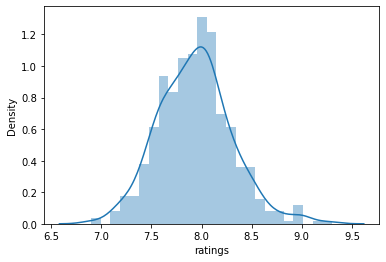

In [135]:
sns.distplot(data['ratings'])

# * Displot of 'votes'

<AxesSubplot:xlabel='votes', ylabel='Density'>

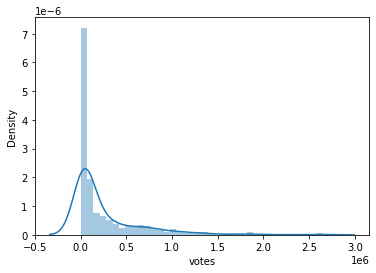

In [136]:
sns.distplot(data['votes'])

# * Displot of 'metascore'

<AxesSubplot:xlabel='metascore', ylabel='Density'>

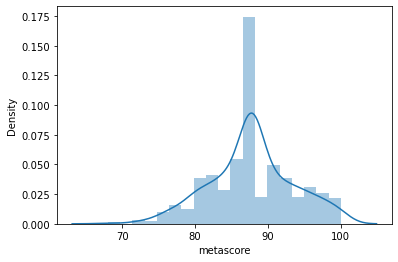

In [137]:
sns.distplot(data['metascore'])

# * Displot of 'gross in million dollars'

<AxesSubplot:xlabel='gross_in_million_dollars', ylabel='Density'>

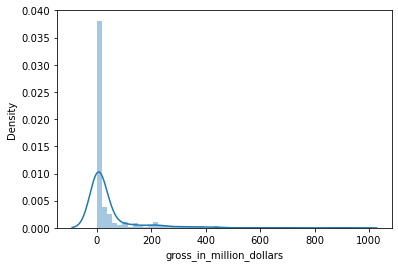

In [138]:
sns.distplot(data['gross_in_million_dollars'])

# * Pie chart of 'genre' 

In [139]:
data.columns

Index(['movie_title', 'year', 'genre', 'duration_in_min', 'ratings',
       'metascore', 'votes', 'gross_in_million_dollars'],
      dtype='object')

<AxesSubplot:ylabel='genre'>

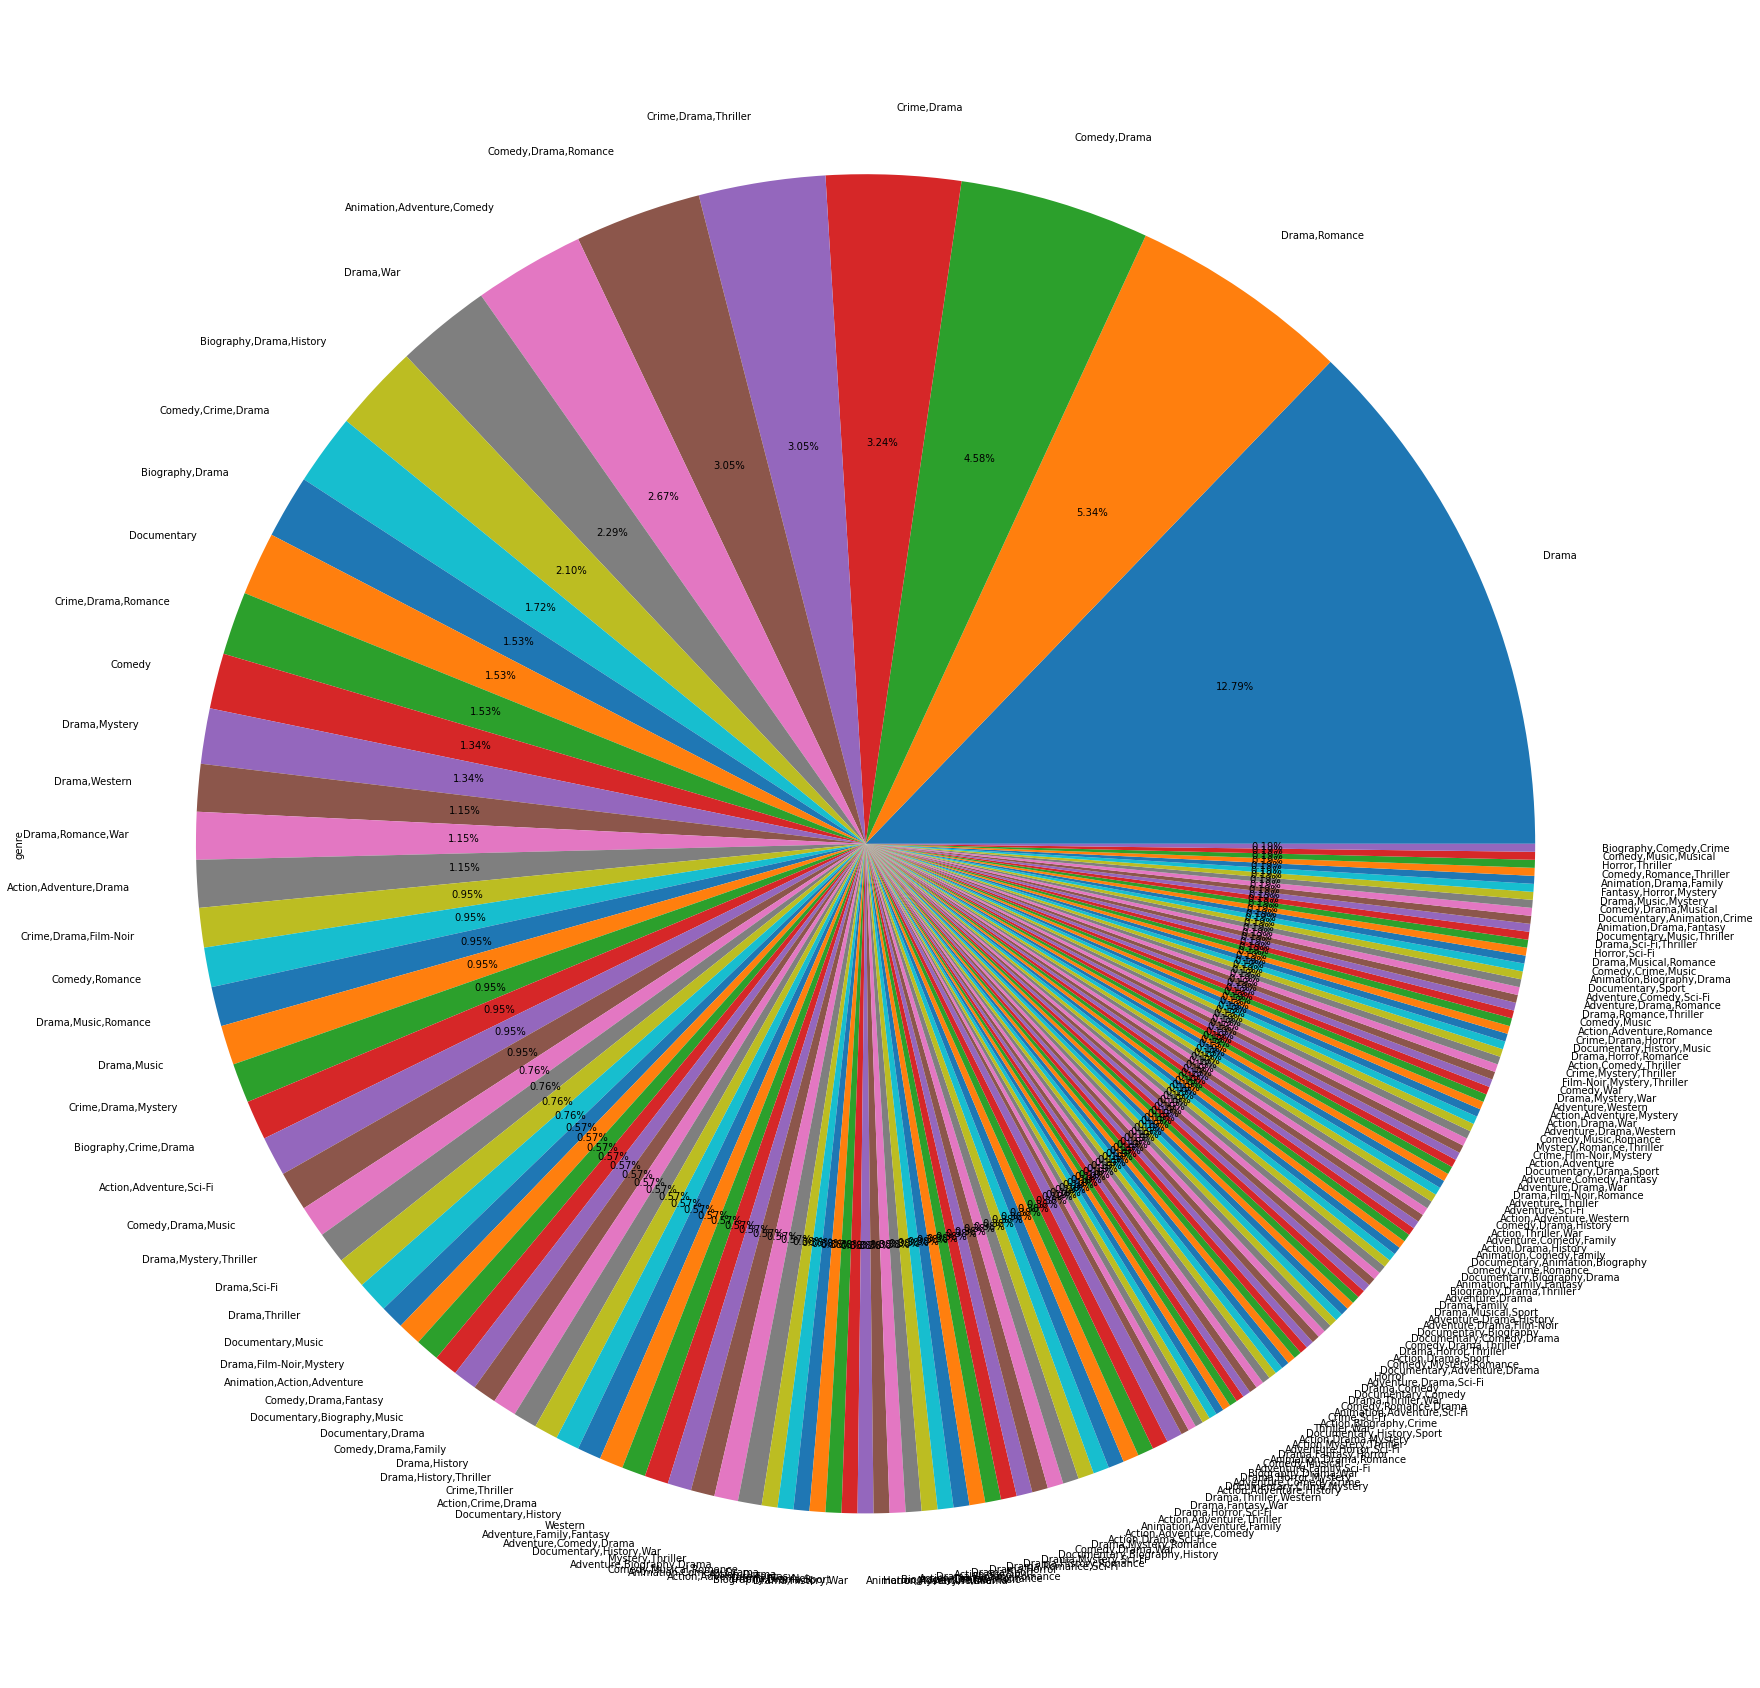

In [140]:
data["genre"].value_counts().plot.pie(figsize = (30,40), autopct="%.2f%%")

# * Countplot...

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

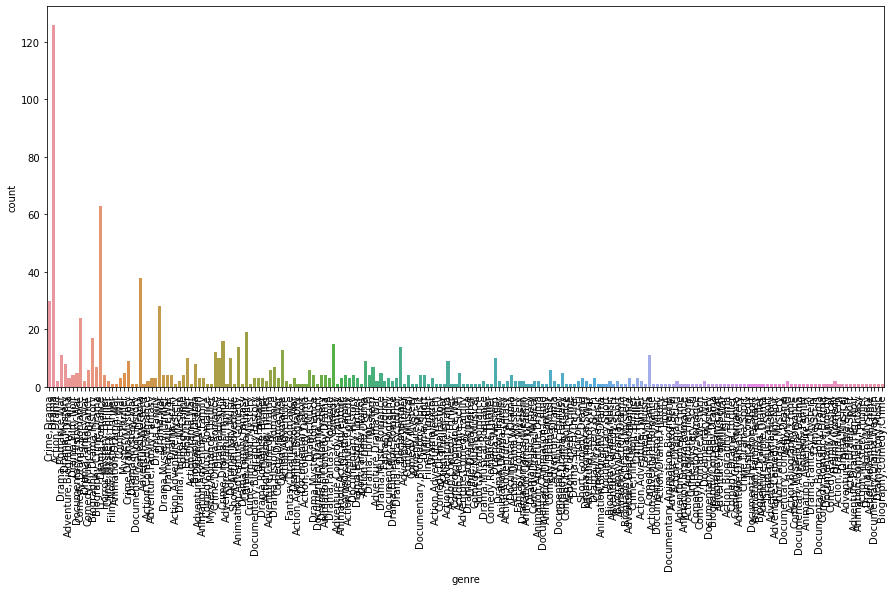

In [141]:
plt.figure(figsize=(15, 7))
sns.countplot(x=df.genre, data=data)
plt.xticks(rotation = 90)

# * COUNTPLOT OF 'GENRE'

In [142]:
data.columns

Index(['movie_title', 'year', 'genre', 'duration_in_min', 'ratings',
       'metascore', 'votes', 'gross_in_million_dollars'],
      dtype='object')

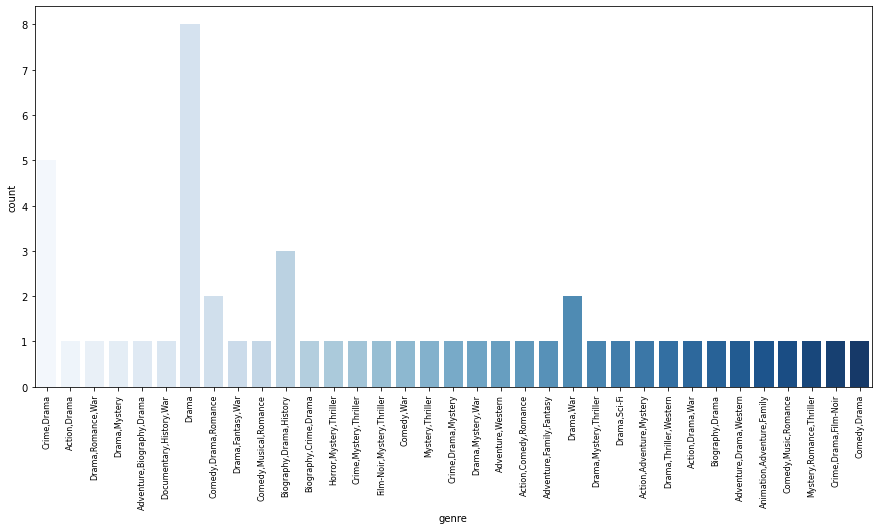

In [143]:
plt.figure(figsize=(15, 7))
sns.countplot(x='genre',data = data.head(50),  palette='Blues')
plt.xticks(rotation=90)
plt.xticks(fontsize=8)
plt.show()

# * Pivot Table of 'gross' and 'rating'

In [144]:
data.columns

Index(['movie_title', 'year', 'genre', 'duration_in_min', 'ratings',
       'metascore', 'votes', 'gross_in_million_dollars'],
      dtype='object')

In [145]:
df.groupby(['gross_in_million_dollars']).agg({'ratings' : ['min', 'max', 'mean']})

ratings               
                             min  max      mean
gross_in_million_dollars                       
0.00                         8.0  8.2  8.100000
0.01                         7.4  8.2  7.900000
0.02                         6.9  8.7  7.990000
0.03                         7.2  8.5  7.766667
0.04                         7.5  8.2  7.742857
...                          ...  ...       ...
534.86                       9.0  9.0  9.000000
608.58                       7.6  7.6  7.600000
700.06                       7.3  7.3  7.300000
858.37                       8.4  8.4  8.400000
936.66                       7.8  7.8  7.800000

[388 rows x 3 columns]

# * Grouping of 'movie title' and 'gross'

<AxesSubplot:xlabel='movie_title'>

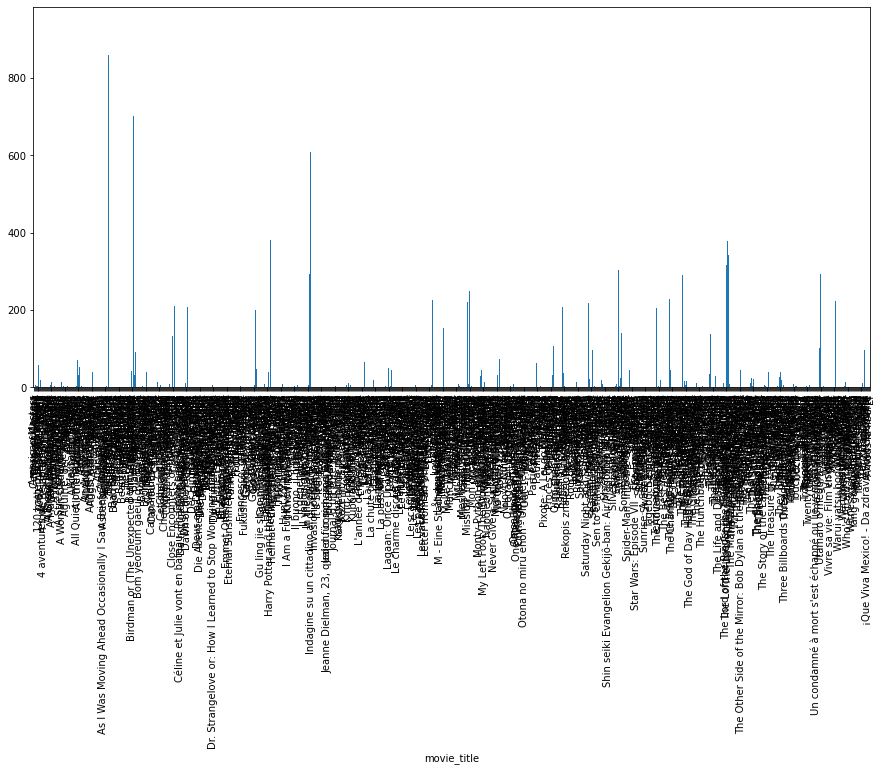

In [146]:
plt.figure(figsize=(15, 7))
df.groupby(['movie_title'])['gross_in_million_dollars'].max().plot(kind = 'bar')

# * RELPLOT OF 'YEAR' AND 'MOVIE_TITLE'

In [147]:
data.columns

Index(['movie_title', 'year', 'genre', 'duration_in_min', 'ratings',
       'metascore', 'votes', 'gross_in_million_dollars'],
      dtype='object')

<Figure size 1080x504 with 0 Axes>

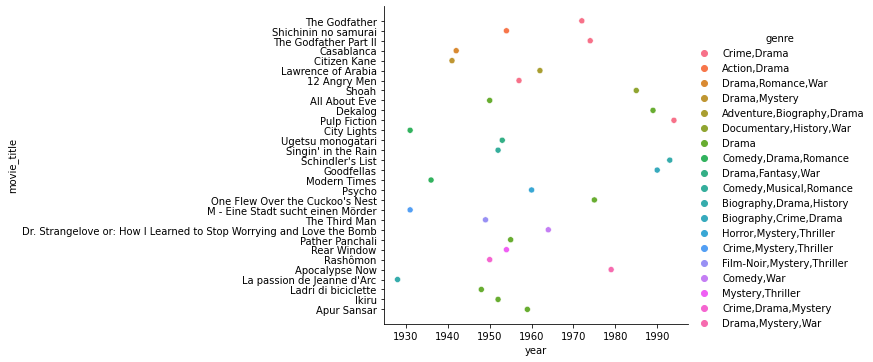

In [148]:
plt.figure(figsize=(15, 7))
sns.relplot(x='year', y='movie_title', data=data.head(30), kind='scatter', hue='genre')
plt.show()


# * RELPLOT OF 'RATINGS' AND 'MOVIE_TITLE'

<Figure size 1080x504 with 0 Axes>

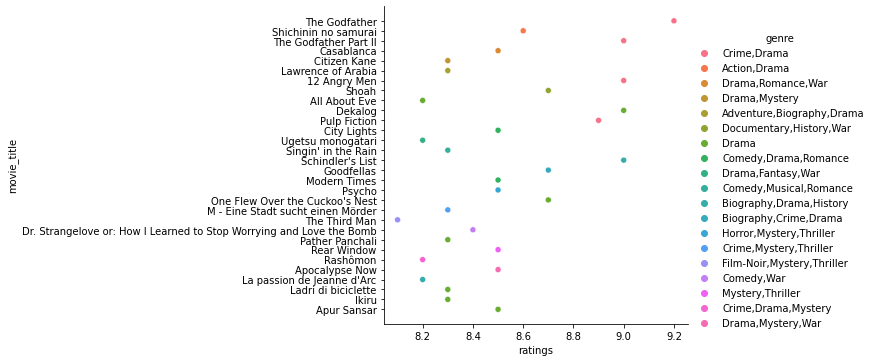

In [149]:
plt.figure(figsize=(15, 7))
sns.relplot(x='ratings', y='movie_title', data=data.head(30), kind='scatter', hue='genre')
plt.show()

# * RELPLOT OF 'VOTES' AND 'MOVIE_TITLE'

<Figure size 1080x504 with 0 Axes>

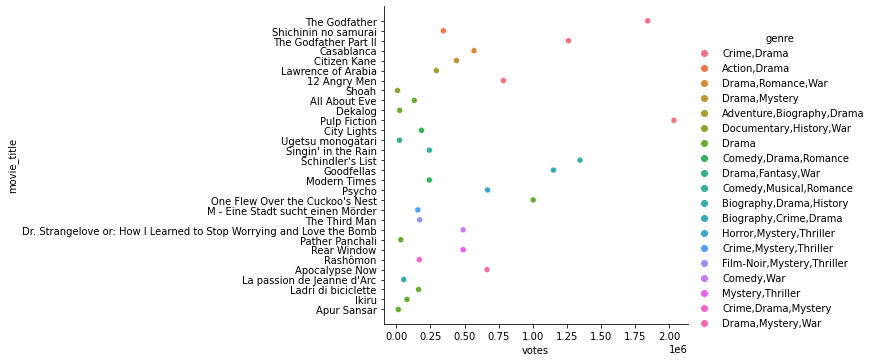

In [150]:
plt.figure(figsize=(15, 7))
sns.relplot(x='votes', y='movie_title', data=data.head(30), kind='scatter', hue='genre')
plt.show()

# * RELPLOT OF 'GROSS' AND 'MOVIE_TITLE'

<Figure size 1080x504 with 0 Axes>

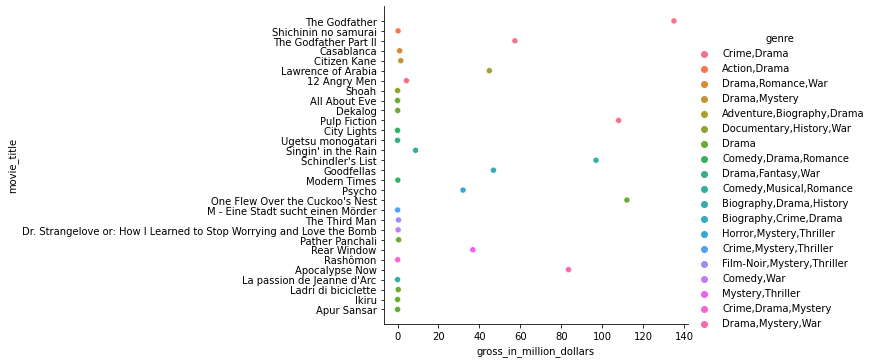

In [151]:
plt.figure(figsize=(15, 7))
sns.relplot(x='gross_in_million_dollars', y='movie_title', data=data.head(30), kind='scatter', hue='genre')
plt.show()

# * RELPLOT OF 'METASCORE' AND 'MOVIE_TITLE'

<Figure size 1080x504 with 0 Axes>

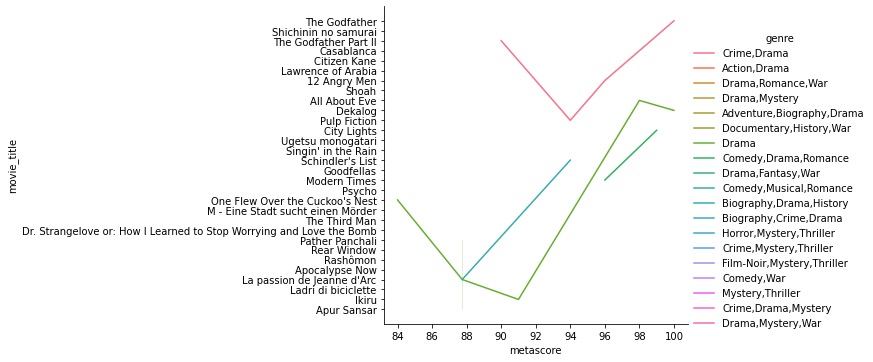

In [152]:
plt.figure(figsize=(15, 7))
sns.relplot(x='metascore', y='movie_title', data=data.head(30), kind='line', hue='genre')
plt.show()

# * REGRESSION PLOT

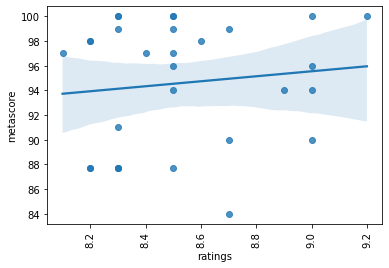

In [153]:
sns.regplot(x='ratings',y='metascore',data=data.head(30))
plt.xticks(rotation=90)
plt.xticks(fontsize=10)
plt.show()

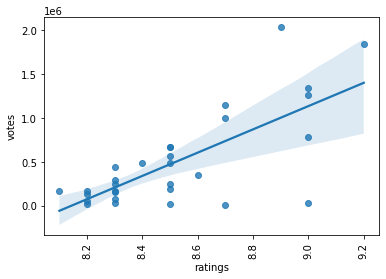

In [154]:
sns.regplot(x='ratings',y='votes',data=data.head(30))
plt.xticks(rotation=90)
plt.xticks(fontsize=10)
plt.show()

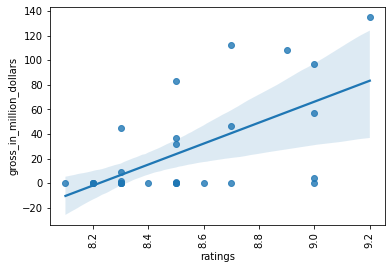

In [155]:
sns.regplot(x='ratings',y='gross_in_million_dollars',data=data.head(30))
plt.xticks(rotation=90)
plt.xticks(fontsize=10)
plt.show()

# * IMPLOT

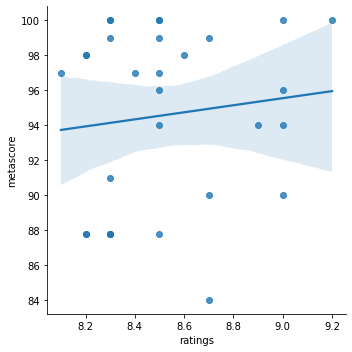

In [156]:
sns.lmplot(x='ratings',y='metascore',data=data.head(30))
plt.show()

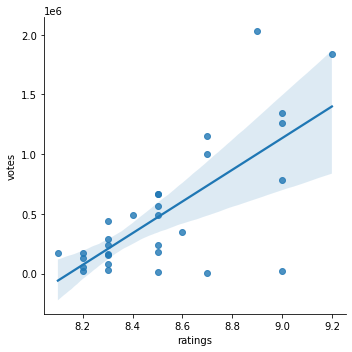

In [157]:
sns.lmplot(x='ratings',y='votes',data=data.head(30))
plt.show()

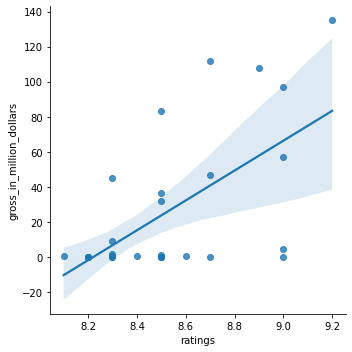

In [158]:
sns.lmplot(x='ratings',y='gross_in_million_dollars',data=data.head(30))
plt.show()

# * DENSITY PLOT

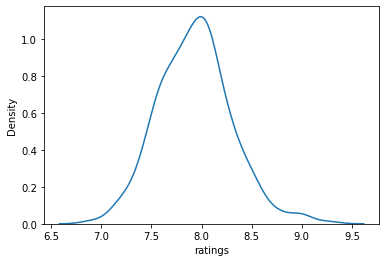

In [159]:
sns.kdeplot(x='ratings',data=data)
plt.show()

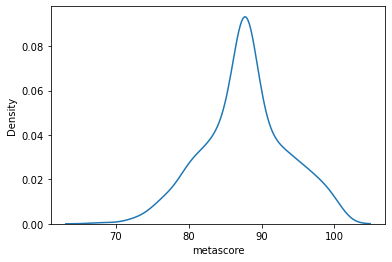

In [160]:
sns.kdeplot(x='metascore',data=data)
plt.show()

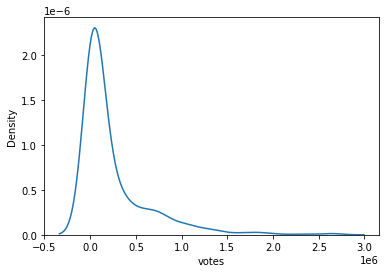

In [161]:
sns.kdeplot(x='votes',data=data)
plt.show()

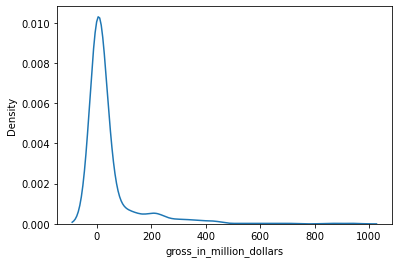

In [162]:
sns.kdeplot(x='gross_in_million_dollars',data=data)
plt.show()

# * JOINTPLOT

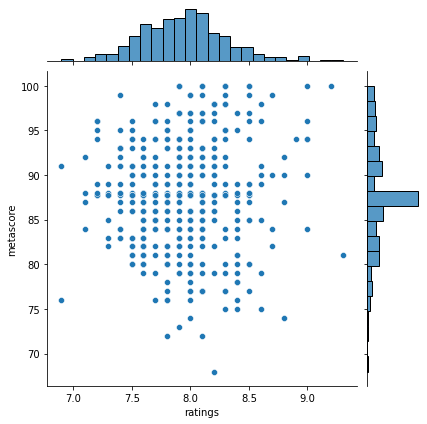

In [163]:
sns.jointplot(data['ratings'],data['metascore'])

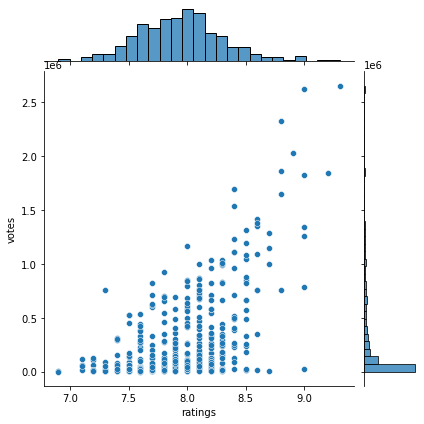

In [164]:
sns.jointplot(data['ratings'],data['votes'])

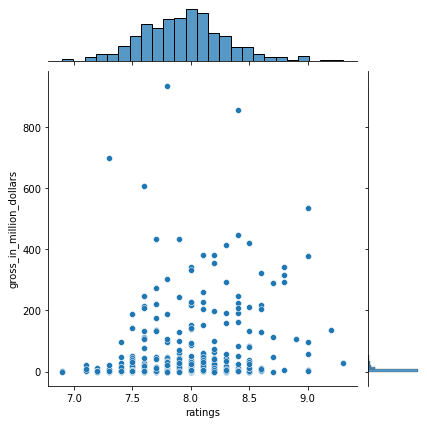

In [165]:
sns.jointplot(data['ratings'],data['gross_in_million_dollars'])

# * HEAT MAP

<function matplotlib.pyplot.show(close=None, block=None)>

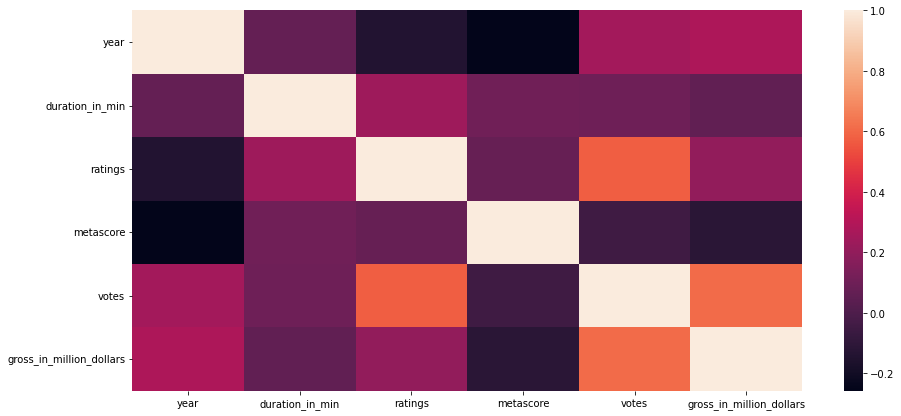

In [166]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr())
plt.show

# * PROJECT CONCLUSION

On my conlcusion I understood that, 

Imdb movies are top movies in the world by their ratings, metascore, votes, gross.

I compared them individually like 1.movie_title with ratings,metascore, votes, gross
                                  2.genre with ratings,metascore, votes, gross etc.....

I showed top movies, genres, top rated movies, top metascore movies, top grossed movies by using various graph plots
with the help of "Data Visualization(matplotlib, seaborn)".

By this project I came to know that, "how to show conclusion with graphs and lot of codes are included to get certain things  which we want".
  
 

# * WHAT I LEARNT BY DOING THIS PROJECT

Firstly I learn that what tools were used, what modules were used etc...

I came to know that, "getting DataFrame with url of a website called webscraping".

I came to know how to use Jupyter, NumPy, Pandas, Data visualization(matplotlib, seaborn).

I felt different kind of experience by doing this project like interaction with mentors, people etc...